통계학에서 가장 일반적인 목표는 다음 질문들에 대한 답을 찾는 것이다. $변수 X(혹은 X_{1}, ... X_{p})$가 변수 Y와 관련이 있는가? 있다면 어떤 관련이 있는가?이를 이용해 Y를 예측할 수 있는가?

특히 '예측' 변숫값을 기반으로 결과(목표) 변수를 예측하는 영역만큼 통계와 데이터 과학이 서로 강하게 연결되는 부분도 없다. 
- 지도학습(Supervised Learning): 이미 결과를 알고 있는 데이터로 모델을 훈련하고 이후에 결과를 모르는 데이터에 적용하는 프로세스

회귀진단은 원래 데이터 분석을 위해 개발되었고, 이것이 발전하면서 비정상적인 데이터를 검출하는데도 사용되고 있다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4.1 단순선형회귀


단순선형회귀는 한 변수와 또 다른 변수의 크기 사이에 어떤 관계에 대한 모델을 제공한다. 앞서 다룬 상관관계 역시 두 변수가 서로 어떤관계인지 보여주는 방법 중 하나이다. 

상관관계가 두 변수 사이의 전체적인 관련 강도를 측정하는 것이라면 ***회귀***는 관계 자체를 정량화하는 방법이다.

##### 용어 정리
- 응답변수/반응변수(response variable)
    - 예측하고자 하는 변수(유의어: 종속변수, 변수 Y, 목표, 출력)

- 독립변수(independent variable):
    - 응답치를 예측하기 위해 사용되는 변수(유의어: 예측변수, 변수 X, 피처, 속성)
    
- 레코드(record): 
    - 한 특정 경우에 대한 입력과 출력을 담고 있는 벡터(유의어: 행, 사건 예시_instance, 예제_example)
    
- 절편(intercept):
    - 회귀직선의 절편 즉, X=0일 때 예측값(유의어: $b_{0}, \beta_{0}$)
    
- 회귀계수(regression coefficient):
    - 회귀직선의 기울기(유의어: 기울기_slope, $b_{1}, \beta_{1}$, 모수 추정치, 가중치)
    
- 적합값(fitted value): 
    - 회귀선으로부터 얻은 추정치 $\hat{Y}_{i}$ (유의어: 예측값)
    
- 잔차(residual):
    - 관측값과 적합값의 차이 (유의어: 오차)
    
- 최소제곱(least square):
    - 잔차의 제곱합을 최소화하여 회귀를 피팅하는 방법(유의어: 보통최소제곱, OLS)

### 4-1-1 회귀식

단순선형회귀를 통해 X가 얼마나 변하면 y가 어느정도 변하는지를 정확히 추정할 수 있다. 상관계수의 경우 변수 X와 변수 Y가 서로 바뀌어도 상관없다. 회귀에서는 다음과 같은 식으로 선형 관계를 이용해 변수 X로부터 Y를 예측하고자 한다.

$$ Y = b_{0} + b_{1}X $$

$'Y는 X에 b_{1}을 곱하고 거기에 b_{0}을 더한 값과 같다'$
- $b_{0}$는 절편(상수) $b_{1}$은 X의 기울기(slope)라고 한다.
- b_{1}은 주로 계수(coefficient)라고 한다.



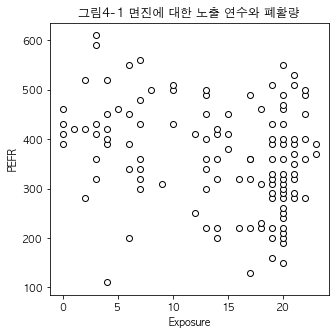

In [2]:
lung = pd.read_csv('./data_in/'+'LungDisease.csv')

fig, ax  = plt.subplots(figsize=(5, 5))

plt.scatter(x=lung['Exposure'], y = lung['PEFR'],
           c='white', edgecolors='black')

plt.title('그림4-1 면진에 대한 노출 연수와 폐활량')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.show()

단순선형회귀는 예측변수 Exposure에 대한 함수로 응답변수 PEFR을 예측하기 위해 가장 최선의 직선을 찾으려 시도한다.

$$PEFR = b_{0} + b_{1}*EXPOSURE $$

In [3]:
from sklearn.linear_model import LinearRegression

predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:_.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


##### 결과
- 절편$b_{0}$: 424.583
- 회귀계수$b_{1}$: -4.185

즉, 노출된 연수가 0 일 때 예측되는 PEFR이 424.583이고, 연수가 1씩 증가할 때마다 PEFR은 -4.185의 비율로 줄어든다고 해석 가능

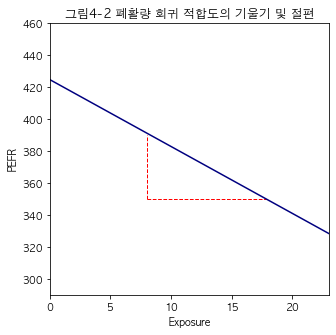

In [4]:
lung = pd.read_csv('./data_in/'+'LungDisease.csv')

fig, ax  = plt.subplots(figsize=(5, 5))

x = lung[predictors]
y = -4.185*x + 424.583

plt.plot(x,y, c='navy')
plt.hlines(350, 8, 18, color='red', linestyle='--', linewidth=1)
plt.vlines(8, 350, 390, color='red', linestyle='--', linewidth=1)


plt.ylim(290,460)
plt.xlim(0,23)

plt.title('그림4-2 폐활량 회귀 적합도의 기울기 및 절편')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.show()

### 4-1-2 적합값과 잔차

회귀분석에서 중요한 개념은 적합값(예측값)과 잔차(예측 오차)이다. 보통 모든 데이터가 정확히 한 직선 안에 들어오지는 않는다. 따라서 회귀식은 명시적으로 오차항 $e_{i}$를 포함한다.

$$ Y_{i} = b_{0} + b_{1}X_{i} + e_{i}$$

***적합값***은 ***예측값***을 지칭하는 말로 보통 $\hat{Y}_{i}$ 으로 나타낸다.

$$ \hat{Y}_{i} = \hat{b}_{0} + \hat{b}_{1}X_{i}$$

$\hat{b}_{0}$와 $\hat{b}_{1}$은 이미 알려진 값이 아닌 추정을 통해 얻은 값

여기서 잔차 $\hat{e}_{i}$는 원래 값에서 예측값을 빼서 구한다.

$$\hat{e}_{i} = Y_{i} - \hat{Y}_{i} $$



In [5]:
fitted = model.predict(lung[predictors])
residuals = lung['PEFR']  - fitted

### 4-1-3 최소제곱

피팅한 모뎅를 어떻게 만들 수 있을까? 실무에서 회귀선은 잔차들을 제곱한 값들의 합인 잔차제곱합(Residual sum of squares_ RSS)을 최소화하는 선이다.

$$ RSS = \Sigma^{n}_{i=1}(Y_{i} - \hat{Y}_{i})^{2}$$

$$= \Sigma^{n}_{i=1}(Y_{i} - \hat{b}_{0}-\hat{b}_{1}X_{i})^{2}$$

다시 말해 추정치 $\hat{b}_{0}$과 $\hat{b}_{1}$ 은 RSS를 최소화하는 값이다.

잔차제곱합을 최소화하는 이러한 방법을 ***최소제곱회귀*** 혹은 ***보통최소제곱(Ordinary least squares _ OLS)회귀***라고 하낟.

### 4-1-4 예측 대 설명(프로파일링)

##### 주요개념
- 회귀방정식은 응답변수 Y와 예측변수 X 간의 관게를 선형함수로 모델링한다.
- 회귀모형은 적합값과 잔차, 즉 반응에 대한 예측과 그 예측 오차를 산출한다.
- 회귀모형은 일반적으로 최소제곱법을 이용해 피팅한다.
- 회귀는 예측과 설명 모두에 사용된다.

# 4-2 다중선형회귀

예측변수가 여러 개라면 수식은 다음과 같다.

$$ Y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{p}X_{p} + e $$

##### 용어정리
- 제곱근평가제곱오차/RMSE(Root Mean Squared Error):
    - 회귀시 평균제곱오차의 제곱회귀모형을 평가하는데 가장 널리 사용되는 지표
- 잔차표준오차/RSE(Residual Standard Error):
    - 평균제곱오차와 동일하지만 자유도에 따라 보정된 값
- R 제곱(R-Squared):
    - 0에서 1까지 모델에 의해 설명된 분산의 비율(유의어: 결정계수)
- t 통계량(t-statistics):
    - 계수의 표준오차로 나눈 예측변수의 계수, 모델에서 변수의 중요도를 비교하는 기준이 된다.
- 가중회귀(weighted Regression):
    - 다른 가중치를 가진 레코드들을 회귀하는 방법

$$ \hat{Y}_{i} = \hat{b}_{0} + \hat{b}_{1}X_{1,i} + \hat{b}_{2}X_{2,i} + ... + \hat{b}_{p}X_{p,i}$$

### 4-2-1 킹 카운티 주택 정보 예제



In [6]:
house = pd.read_csv('./data_in/'+'house_sales.csv', delimiter='\t')
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
         'Bedrooms', 'BldgGrade']

house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


목표는 이런 변수들을 통해 ***판매금액***을 예측하는 것. 

In [7]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
             'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [8]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients: ')
for name, coef in zip(predictors, house_lm.coef_):
    print(f'- {name}: {coef}')

Intercept: -521871.368
Coefficients: 
- SqFtTotLiving: 228.83060360240796
- SqFtLot: -0.06046682065307607
- Bathrooms: -19442.840398321056
- Bedrooms: -47769.95518521438
- BldgGrade: 106106.96307898083


### 4-2-2 모형 평가

데이터 과학의 관점에서 가장 중요한 성능 지표는 바로 ***제곱근평균오차(RMSE)***이다. RMSE는 예측된 $\hat{y}_{i}$ 값들의 평균제곱오차의 제곱근을 말한다.

$$ RMSE = \sqrt\frac{\Sigma^{n}_{i=1}(y_{i} - \hat{y}_{i})^{2}}{n}$$

전반적인 모델의 정확도를 측정하고 다른 모델(머신러닝 기술로 학습된 모델을 포함)과 비교하기 위한 기준이 된다. 이 외에도 RMSE와 유사한 ***잔차 표준오차(RSE)***가 있다. 예측변수가 p개일 때 RSE는 다음과 같다.

$$ RSE = \sqrt\frac{\Sigma^{n}_{i=1}(y_{i} - \hat{y}_{i})^{2}}{n-p-1}$$

유일한 차이점은 분모가 데이터 수가 아닌 ***자유도***라는 점이다.

In [9]:
# 결정계수에 대한 RMSE와 r2_score를 얻기 위해 mean_squared_error를 사용
from sklearn.metrics import mean_squared_error, r2_score
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)

print(f'RMSE: {RMSE: 0f}')
print(f'r2: {r2:.4f}')

RMSE:  261220.197437
r2: 0.5406


In [10]:
# 회귀모형에 대한 자세한정보: statsmodels
import statsmodels.api as sm
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:37:43   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

팬더스의 assign 메서드는 값인 상수 열을 예측변수에 추가한다. 이것은 절편을 모델링하기 위해 필요하다.

소프트웨어 출력에서 볼 수 있는 또 다른 유용한 지표는 ***결정계수***라고도 부르는 ***R 제곱 통계량($R^{2}$)***이다. 모델 데이터의 변동률을 측정하며 모델이 데이터에 얼마나 적합한지 평가하고자 할 때 사용된다.

##### $R^{2}$에 관하여
- SST(Total Sum of Squared):
    - 관측값에서 관측값의 평균을 뺀 것의 총합
    - $\Sigma^{n}_{i=1}(y_{i} - \bar{y})^{2}$

- SSR(Residual Sum of Square):
    - 관측값에서 추정값을 뺀 값들의 합(에러의 분산) 즉 설명되지 않는 부분 
    - $\Sigma^{n}_{i=1}(y_{i} - \hat{y}_{i})^{2}$

- SSE(Explained sum of Squares):
    - 추정값에서 관측값의 평균을 뺀 결과의 총합. 즉 설명되는 분산(겹치는 부분)이다.
    - $\Sigma^{n}_{i=1}(\hat{y}_{i} - \bar{y})^{2}$
    
$$ R^{2} = \frac{SSE}{SST} = 1 - \frac{SSR}{SST} $$    



### 4-2-3 교차타당성검사

지금까지 다룬 전형적인 통계적 회귀 측정 지표들($R^2$, F 통계량, p 값 등)은 모두 '표본 내' 지표들이다. 모델을 구하는데 사용했던 데이터를 똑같이 그대로 사용한다. 

교차타당성검사(Cross-Validation)란, 홀드아웃 샘플 아이디어를 여러 개의 연속된 홀드아웃 샘플로 확장한 것이다. 기본적인 K-다중 교차타당성검사 알고리즘은 다음과 같다.

1. 1/k의 데이터를 홀드아웃 샘플로 따로 떼어놓는다.
2. 남아 있는 데이터로 모델을 훈련시킨다.
3. 모델을 1/k 홀드아웃에 적용(점수를 매김)하고 필요한 모델 평가지표를 기록
4. 4. 데이터의 첫 번째 1/k을 복원하고 다음 1/k(앞에서 선택했던 레코드 제외)을 따로 보관한다.
5. 2~3을 반복한다.
6. 모든 레코드가 홀드아웃 샘플로 사용될 때까지 반복한다.
7. 모델 평가 지표들을 평균과 같은 방식으로 결합한다.

훈련을 위한 샘플과 홀드아웃 샘플로 데이터를 나누는 것을 폴드(fold)라고 한다.

In [11]:
### 4-2-4 모형 선택 및 단계적 회귀

In [12]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade',
'PropertyType', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt',
'YrRenovated', 'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first = True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:37:43   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

오컴의 면도날, 모든 것이 동일한 조건에서는 복잡한 모델보다는 단순한 모델을 우선 사용해야 한다. 변수를 추가할수록 학습 데이터에 대해 항상 RMSE는 감소하고 $R^2$은 증가한다. 

모델 복잡성을 함께 고려하는 한 가지 방법은 수정 R 제곱을 사용하는 것이다.

$$ R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-P-1}$$

여기서 n은 레코드 수, P는 모델의 변수 개수를 의미함

***AIC를 최소로 하거나 $R^2$을 최대로 하는 모델을 어떻게 찾을 수 있을까?*** 한가지 방법은 ***부분집합회귀(all subset regression)***로서 모든 가능한 모델을 검색하는 방법이다. 계산 비용이 많이 들며, 대용량 데이터와 변수가 많은 문제에 부적합.

매력적인 대안은 ***단계적 회귀(Stepwise Regression)***를 사용하는 것이다. 전체 모델부터 시작하여 별로 의미없는 변수들을 연속적으로 삭제할 수 있다(후진제거). 또는 상수 모델에서 시작하여 연속적으로 변수를 추가할 수 있다(전진선택).



In [13]:
from dmba import stepwise_selection, forward_selection, backward_elimination,AIC_score
y = house[outcome]

def train_model(variables):
    if len(variables) ==0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0 :
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model,
                                               score_model, verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients')
for name, coef in zip(best_variables, best_model.coef_):
    print(f'{name}: {coef}')

no display found. Using non-interactive Agg backend
Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None
Intercept: 6178645.017
Coefficients
SqFtTotLiving: 199.27755304201884
BldgGrade: 137159.56022619773
YrBuilt: -3565.4249392492993
Bedrooms: -51947.38367361318
Bathrooms: 42396.164527717796
PropertyType_Townhouse: 84479.16203300405
SqFtFinBasement: 7.046974967553979
PropertyType_Single Family: 22912.055187017682


1. 주어진 변수 집합에 대해 적합 모델을 반환하는 함수를 정의한다.
2. 주어진 모델 변수 세트에 대한 점수를 반환하는 함수를 정의한다. 이 경우 dmba 패키지에 구현된 AIC_score를 사용한다.

### 4-2-5 가중회귀

통계학자들은 다양한 목적으로 가중회귀를 사용한다. 데이터 과학자들은 아래 두 가지 점에서 가중회귀의 유용성을 발견할 수 있다.

- 서로 다른 관측치를 다른 정밀도로 측정했을 때, 역분산 가중치를 얻을 수 있다. 분산이 높을수록 가중치가 낮다.
- 가중치 변수가 집계된 데이터의 각 행이 나타내는 원본 관측치의 수를 인코딩하도록 행이 여러 경우를 의미하는 데이터를 분석할 수 있다.



In [14]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [15]:
# 가중회귀
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight = house.Weight)

LinearRegression()

##### 주요개념

- 다선형회귀모형은 한 응답변수Y와 여러 개의 예측변수($X_l, ... X_p$) 간의 관계를 나타냄
- 모델을 평가하는 가장 중요한 지표는 제곱근평균제곱오차(RMSE)와 R제곱($R^2$)이다.
- 계수들의 표준오차는 모델에 대한 변수 기여도의 신뢰도를 측정하는데 사용된다.
- 단계적 회귀는 모델을 만드는데 필요한 변수들을 자동으로 결정하는 방법이다.
- 가중회귀는 바엉식을 피팅할 때 레코드별로 가중치를 주기위해 사용한다.

# 4-3 회귀를 이용한 예측

데이터 과학에서 회귀의 주된 목적은 예측. 기존의 오랫동안 자리잡은 전통적인 의미의 통게학에서 회귀는 예측보다 설명을 위한 모델링에 더 적합했다.

##### 용어 정리
- 예측구간(prediction interval): 개별 예측값 주위의 불확실한 구간
- 외삽(extrapolation): 모델링에 사용된 데이터 범위를 벗어난 부분까지 모델을 확장하는 것

### 4-3-1 외의 위험
회귀모형을 데이터 범위를 초과하면서까지 외삽하는데 사용해서는 안 된다. 회귀모형은 충분한 데이터 값이 있는 예측변수에 대해서만 유효하다.

### 4-3-2 신뢰구간과 예측구간
통계학은 변동성(불확실성)을 이해하고 측정하는 것을 포함한다. 회귀분석 결과에 나오는 t통계량과 p 값은 이 변동성을 다루는 아주 일반적인 방법이고 종종 변수 선택을 위해 활용된다. 이외에 더 유용한 지표로 회귀계수와 예측을 둘러싼 불확실성 구간을 의미하는 신뢰구간이 있다.

##### 예측구간이냐 신뢰구간이냐?
예측구간은 하나의 값에 대한 불확실성과 관련되는 반면 신뢰구간은 여러 값에서 계산된 평균이나 다른 통계량과 관련된다. 따라서 예측구간은 일반적으로 같은 값에 대해 신뢰구간 보다 훨씬 넓다. 

##### 주요 개념
- 데이터 범위를 벗어나는 외삽은 오류를 유발할 수 있다.
- 신뢰구간은 회귀계수 주변의 불확실성을 정량화한다.
- 예측구간은 개별 예측값의 불확실성을 정량화한다.

# 4-4 회귀에서의 요인변수

범주형변수(요인변수)는 개수가 제한된 이산값을 취한다. 지표변수라고도 불리는 이진변수(예/아니오)는 요인변수의 특수한 경우다. 회귀분석에는 수치입력이 필요하기 때문에 모델에 사용할 수 있도록 요인변수를 다시 수치화해야 한다. 이를 위한 가장 일반적인 방법은 변수를 이진 가변수들의 집합으로 변환하는 것이다.

##### 용어 정리
- 가변수(dummy variable): 
    - 회귀나 다른 모델에서의 요인 데이터를 사용하기 위해 0과 1의 이진변수로 부호화한 변수

- 기준 부호화(reference coding): 
    - 통계학자들이 많이 사용하는 부호화 형태 여기서 한 요인을 기준으로 하고 다른 요인들이 이 기준에 따라 비교할 수 있도록 한다. (유의어: 처리 부호화)
    
- 원-핫 인코딩(One-Hot Encoding):
    - 머신러닝 분야에서 많이 사용되는 부호화 모든 요인 수준이 계속 유지된다. 어떤 머신러닝 알고리즘에서는 유용한 반면 다중선형회귀에는 적합하지 않다.
    
- 편차 부호화(Deviation Coding):
    - 기준 수준과는 반대로 전체 평균에 대해 각 수준을 비교하는 부호화 방법(유의어: 총합 대비)


### 4-4-1 가변수 표현


In [16]:
house.PropertyType.head()

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object

이떄 가능한 값은 Multiplex, Single Family, Townhouse 세가지다. 이 요인변수를 사용하기 위해 이진변수들로 변환해보자. 

In [17]:
pd.get_dummies(house['PropertyType']).head()

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [18]:
# 기본적으로 범주형 변수의 원-핫인코딩을 변환한다.
pd.get_dummies(house['PropertyType']).head()

# 키워드 인수 drop_first는 P-1개의 열을 반환한다. (다중공선성 피하기)
pd.get_dummies(house['PropertyType'], drop_first=True).head()

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


KNN이나 트리모델 같은 머신러닝 알고리즘에서 요인변수를 표현하는데 원-핫 인코딩을 사용한다.

회귀분석에서 P개의 개별 수준을 갖는 요인변수는 보통 p-1개의 열을 갖는 행렬로 표시된다. 회귀모형에 일반적으로 절편이 포함되기 때문이다. 

get_dummies 메서드는 첫 번째 요소를 참조로 제외하기 때문에 선택적 키워드 인수 drop_first를 사용한다.

In [19]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
             'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first = True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f'- {name}: {coef}')

Intercept: -446841.366
Coefficients:
- SqFtTotLiving: 223.37362892503822
- SqFtLot: -0.0703679813681255
- Bathrooms: -15979.013473415183
- Bedrooms: -50889.73218483028
- BldgGrade: 109416.3051614618
- PropertyType_Single Family: -84678.21629549256
- PropertyType_Townhouse: -115121.97921609186


##### 그 밖의 요인변수 코딩법들

요인 변수를 인코딩하는 데는 ***대비 부호화(Contrast Coding)*** 시스템이라는 다른 방법이 있다. 예를 들어 ***총합 대비***라고도 하는 ***편차 부호화*** 방법은 각 수준을 전반적인 평균과 비교한다. 또 다른 대비 방법은 ***다항식 부호화(Polynomial Coding)***이며 순서가 있는 요인변수에 적합하다. 

일반적으로 기준 코딩이나 원-핫인코딩 이외에 다른 유형의 코딩을 접할일이 거의 없다.

### 4-4-2 다수의 수준을 갖는 요인변수들



In [20]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98043,98068,98113
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [23]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])


LinearRegression()

ZipCode는 주택 가격에 대한 위치의 효과를 볼 수 있는 중요한 변수이다. 다만 모든 수준을 포함하려면 자유도 79에 해당하는 79개의 계수가 필요하다. 

대안은 매매 가격과 같은 다른 변수에 따라 우편번호를 그룹으로 묶는 것이다. 아니면 초기 모델의 잔차를 사용하여 우편번호 그룹을 만드는 방법도 좋다.

80개의 우편번호를 house_lm 회귀 결과의 잔차값의 중간값을 기준으로 5개의 그룹으로 통합한다.

In [28]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')    

zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False,
                                retbins=False)

to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on= 'ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

### 4-4-3 순서가 있는 요인변수

일부 요인변수는 요인의 수준이 순서를 갖는다. 이것을 ***순서 요인변수(ordered factor variable)*** 또는 ***순서 범주형 변수(ordered categorical variable)***라고 한다. 

예를 들어 대출 등급은 A,B,C 등이 될 수 있다. 각 등급은 이전 등급보다 위험이 더 크다. 순서 요인변수는 일반적으로 숫자 값으로 변환하여 그대로 사용할 수 있다. 예를 들면 변수 BlgdGrade는 순서 요인변수이다. 

##### 주요 개념
- 요인변수는 회귀를 위해 수치형 변수로 변환해야 한다.
- 요인변수를 P개의 개별 값으로 인코딩하기 위한 가장 흔한 방법은 P-1개의 가변수를 만들어 사용하는 것
- 다수의 수준을 갖는 요인변수의 경우 더 작은 수의 수준을 갖는 변수가 되도록 수준들을 통합해야 한다.
- 순서를 갖는 요인변수의 경우 수치형 변수로 변환하여 사용할 수 있따.

# 4-5 회귀방정식 해석

데이터 과학에서 회귀의 가장 중요한 용도는 일부 종속변수(결과변수)를 예측하는 것이다. 하지만 때로는 예측변수와 결과 간 관계의 본질을 이해하기 위해 방정식 자체로부터 통차을 얻는 것이 중요할 떄도 있다.

##### 용어 정리
- 변수 간 상관(correlated Variables): 
    - 변수들이 같은 방향으로 움직이려는 경향을 가짐. 예측변수끼리 서로 높은 상관성을 가질 때는 개별 계수를 해석하는 것이 어렵다.
    
- 다중공선성(Multicollinearity):
    - 예측변수들이 완벽하거나 거의 완벽에 가까운 상관성을 갖는다고 할 때 회귀는 불안정하며 계산이 불가능하다(유의어: 공선성_collinearity)
    
- 교란변수(confounding Variable):
    - 중요한 예측변수이지만 회귀방정식에 누락되어 결과를 잘못되게 이끄는 변수
    
- 주효과(main effect):
    - 다른 변수들과 독립된, 하나의 예측변수와 결과변수 사이의 관계
    
- 상호작용(interaction):
    - 둘 이상의 예측변수와 응답변수 사이의 상호 의존적인 관계
    
### 4-5-1 예측변수 간 상관
다중회귀분석에서 예측변수는 종종 서로 상관성이 있다. 

In [39]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients: ')
for name, coef in zip(best_variables, best_model.coef_):
    print(f'- {name}: {coef}')

Intercept: 6178645.017
Coefficients: 
- SqFtTotLiving: 199.27755304201884
- BldgGrade: 137159.56022619773
- YrBuilt: -3565.4249392492993
- Bedrooms: -51947.38367361318
- Bathrooms: 42396.164527717796
- PropertyType_Townhouse: 84479.16203300405
- SqFtFinBasement: 7.046974967553979
- PropertyType_Single Family: 22912.055187017682
